In [7]:
import pandas as pd
from recursive_clustering.estimator import RecursiveClustering
from sklearn.datasets import make_blobs, make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import HDBSCAN, OPTICS
from sklearn.metrics import rand_score, adjusted_rand_score, mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score, homogeneity_completeness_v_measure, silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from time import perf_counter

In [8]:
def calculate_scores(y_true, y_pred, X=None):
    rand = rand_score(y_true, y_pred)
    adjusted_rand = adjusted_rand_score(y_true, y_pred)
    mutual_info = mutual_info_score(y_true, y_pred)
    adjusted_mutual_info = adjusted_mutual_info_score(y_true, y_pred)
    normalized_mutual_info = normalized_mutual_info_score(y_true, y_pred)
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(y_true, y_pred)
    scores = {
        'rand': rand,
        'adjusted_rand': adjusted_rand,
        'mutual_info': mutual_info,
        'adjusted_mutual_info': adjusted_mutual_info,
        'normalized_mutual_info': normalized_mutual_info,
        'homogeneity': homogeneity,
        'completeness': completeness,
        'v_measure': v_measure,
    }
    if X is not None:
        silhouette = silhouette_score(X, y_pred)
        scores['silhouette'] = silhouette
    return scores

In [9]:
def plot_confusion_matrix(y_true, y_pred):
    labels_true = pd.Series(y_true)
    labels_pred = pd.Series(y_pred)
    y_true = labels_true.factorize()[0]
    y_pred = labels_pred.factorize()[0]
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

In [10]:
def fit_predict_score_summary(estimator, X, y):
    # fit and predict
    start_time = perf_counter()
    labels = estimator.fit_predict(X)
    elapsed_time = perf_counter() - start_time
    # number of clusters
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    # scores
    scores = calculate_scores(y, labels, X)
    scores['n_clusters'] = n_clusters
    scores['elapsed_time'] = elapsed_time
    return_dict = {
        'labels': labels,
        'scores': scores
    }
    return return_dict

In [25]:
def compare_estimators(X, y, random_state, **kwargs):
    return_dict = {}
    # our estimator
    estimator = RecursiveClustering(random_state=random_state, **kwargs)
    our_return = fit_predict_score_summary(estimator, X, y)
    return_dict['our'] = our_return
    # # DBSCAN
    # dbscan = DBSCAN(eps=50, min_samples=5)
    # dbscan_return = fit_predict_score_summary(dbscan, X, y)
    # return_dict['dbscan'] = dbscan_return
    # HDBSCAN
    hdbscan = HDBSCAN(min_cluster_size=5)
    hdbscan_return = fit_predict_score_summary(hdbscan, X, y)
    return_dict['hdbscan'] = hdbscan_return
    # # MeanShift
    # meanshift = MeanShift(bandwidth=50)
    # meanshift_return = fit_predict_score_summary(meanshift, X, y)
    # return_dict['meanshift'] = meanshift_return
    # OPTICS
    optics = OPTICS(min_samples=5)
    optics_return = fit_predict_score_summary(optics, X, y)
    return_dict['optics'] = optics_return
    scores_dict = {k: v['scores'] for k, v in return_dict.items()}
    scores_frame = pd.DataFrame.from_records(scores_dict)
    display(scores_frame)
    return return_dict

In [112]:
# dataset parameters
n_samples = 100
n_features = 100000
centers = 30
random_state = 42
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, random_state=random_state)

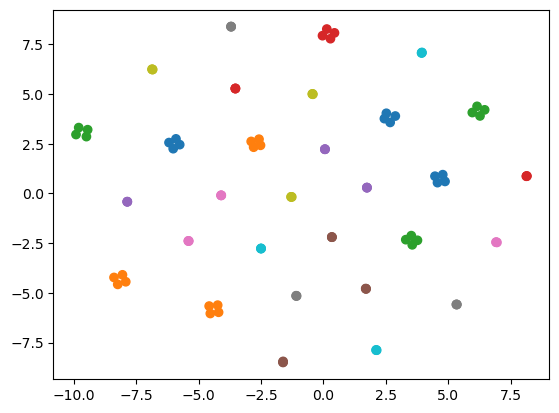

In [113]:
# t-SNE visualization
tsne = TSNE(n_components=2, random_state=random_state)
X_embedded = tsne.fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10')

In [120]:
return_dict = {}
kwargs = {}
# our estimator
estimator = RecursiveClustering(random_state=random_state, repetitions=10)
our_return = fit_predict_score_summary(estimator, X, y)
return_dict['our'] = our_return
print(our_return)

{'labels': array([ 0,  1,  2,  3,  4,  5,  6,  5,  7,  8,  9, 10, 11, 12, 13,  7,  4,
       14, 15, 16,  3, 17, 18, 19, 16,  9, 13, 14, 14, 20, 21, 22, 23, 17,
       24, 23, 11, 25, 26, 24,  0, 27,  2, 23, 10,  4, 24,  3, 13, 16, 26,
       28, 20, 18,  1, 22,  0, 26, 23,  8, 22,  0, 17,  3, 22, 25, 26, 21,
        6, 19, 27,  1, 12,  5, 11, 29, 12,  7, 11, 15, 25,  8, 20,  2, 29,
        6, 27, 15, 18, 18, 10, 28, 28, 16, 27, 19, 21, 29,  7,  9]), 'scores': {'rand': 1.0, 'adjusted_rand': 1.0, 'mutual_info': np.float64(3.391485068339269), 'adjusted_mutual_info': np.float64(0.9999999999999997), 'normalized_mutual_info': np.float64(0.9999999999999999), 'homogeneity': np.float64(1.0), 'completeness': np.float64(0.9999999999999999), 'v_measure': np.float64(0.9999999999999999), 'silhouette': np.float64(0.8287495756248755), 'n_clusters': 30, 'elapsed_time': 0.3520781659999557}}


In [37]:
# # DBSCAN
# dbscan = DBSCAN(eps=50, min_samples=5)
# dbscan_return = fit_predict_score_summary(dbscan, X, y)
# return_dict['dbscan'] = dbscan_return
# HDBSCAN
hdbscan = HDBSCAN(min_cluster_size=5)
hdbscan_return = fit_predict_score_summary(hdbscan, X, y)
return_dict['hdbscan'] = hdbscan_return
print(hdbscan_return)

{'labels': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  1, -1, -1, -1,  0,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  1, -1, -1,
       -1,  1,  1, -1, -1, -1, -1,  0, -1,  1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  0]), 'scores': {'rand': np.float64(0.35797979797979795), 'adjusted_rand': 0.011886680812093209, 'mutual_info': np.float64(0.4581844707303623), 'adjusted_mutual_info': np.float64(0.10367097110329664), 'normalized_mutual_info': np.float64(0.22758506322492889), 'homogeneity': np.float64(0.13509847795223362), 'completeness': np.float64(0.7215449423375362), 'v_measure': np.float64(0.2275850632249289), 'silhouette': np.float64(0.02192421093357115), 'n_clusters': 2, 'elapsed_time': 1.9728880499997103}}


In [38]:
# # MeanShift
# meanshift = MeanShift(bandwidth=50)
# meanshift_return = fit_predict_score_summary(meanshift, X, y)
# return_dict['meanshift'] = meanshift_return
# OPTICS
optics = OPTICS(min_samples=5)
optics_return = fit_predict_score_summary(optics, X, y)
return_dict['optics'] = optics_return
scores_dict = {k: v['scores'] for k, v in return_dict.items()}
scores_frame = pd.DataFrame.from_records(scores_dict)
print(optics_return)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [33]:
display(scores_frame)

,hdbscan,optics,our
rand,1.000000,1.000000,1.000000
adjusted_rand,1.000000,1.000000,1.000000
mutual_info,3.401098,3.401098,3.401098
adjusted_mutual_info,1.000000,1.000000,1.000000
normalized_mutual_info,1.000000,1.000000,1.000000
homogeneity,1.000000,1.000000,1.000000
completeness,1.000000,1.000000,1.000000
v_measure,1.000000,1.000000,1.000000
silhouette,0.828713,0.828713,0.828713
n_clusters,30.000000,30.000000,30.000000


In [27]:
# compare estimators
results = compare_estimators(X, y, random_state)


KeyboardInterrupt



In [106]:
# dataset parameters
n_samples = 100
n_random_features = 0
n_informative = int(1e3)
n_redundant = 100
n_repeated = 100
n_features = n_informative + n_redundant + n_repeated + n_random_features
n_classes = 10
n_clusters_per_class = 1
weights = None
flip_y = 0
class_sep = 6
hypercube = True
shift = 0.0
scale = 1.0
shuffle = True
random_state = 42
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, n_redundant=n_redundant, n_repeated=n_repeated, n_classes=n_classes, n_clusters_per_class=n_clusters_per_class, weights=weights, flip_y=flip_y, class_sep=class_sep, hypercube=hypercube, shift=shift, scale=scale, shuffle=shuffle, random_state=random_state)

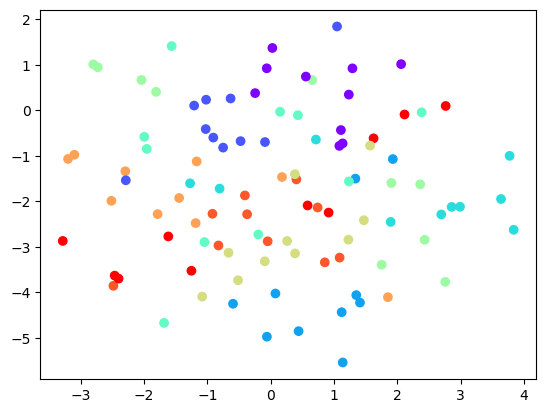

In [107]:
# t-SNE visualization
tsne = TSNE(n_components=2, random_state=random_state)
X_embedded = tsne.fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='rainbow')

In [109]:
return_dict = {}
kwargs = {}
# our estimator
estimator = RecursiveClustering(random_state=random_state, repetitions=3, kmeans_n_clusters=3, components_size=10)
our_return = fit_predict_score_summary(estimator, X, y)
return_dict['our'] = our_return
print(our_return)

{'labels': array([0, 1, 2, 2, 3, 2, 0, 4, 3, 3, 4, 4, 0, 4, 4, 4, 3, 2, 3, 2, 2, 4,
       4, 2, 2, 3, 4, 4, 4, 0, 3, 2, 3, 3, 4, 2, 4, 2, 3, 2, 3, 2, 2, 5,
       3, 0, 4, 4, 2, 0, 4, 4, 4, 4, 3, 6, 4, 3, 5, 0, 4, 4, 5, 3, 4, 4,
       3, 4, 3, 4, 3, 3, 1, 4, 5, 3, 3, 3, 3, 5, 2, 3, 0, 7, 3, 5, 3, 3,
       0, 4, 0, 4, 3, 3, 3, 2, 2, 4, 3, 5]), 'scores': {'rand': np.float64(0.7268686868686869), 'adjusted_rand': 0.01051230871590153, 'mutual_info': np.float64(0.3205441567974214), 'adjusted_mutual_info': np.float64(0.016566222625790984), 'normalized_mutual_info': np.float64(0.1634487893326586), 'homogeneity': np.float64(0.13921055850345082), 'completeness': np.float64(0.19790672860152728), 'v_measure': np.float64(0.1634487893326586), 'silhouette': np.float64(-0.04013087568723999), 'n_clusters': 8, 'elapsed_time': 0.31281661100001656}}


In [110]:
# # DBSCAN
# dbscan = DBSCAN(eps=50, min_samples=5)
# dbscan_return = fit_predict_score_summary(dbscan, X, y)
# return_dict['dbscan'] = dbscan_return
# HDBSCAN
hdbscan = HDBSCAN(min_cluster_size=5)
hdbscan_return = fit_predict_score_summary(hdbscan, X, y)
return_dict['hdbscan'] = hdbscan_return
print(hdbscan_return)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [111]:
# # MeanShift
# meanshift = MeanShift(bandwidth=50)
# meanshift_return = fit_predict_score_summary(meanshift, X, y)
# return_dict['meanshift'] = meanshift_return
# OPTICS
optics = OPTICS(min_samples=5)
optics_return = fit_predict_score_summary(optics, X, y)
return_dict['optics'] = optics_return
scores_dict = {k: v['scores'] for k, v in return_dict.items()}
scores_frame = pd.DataFrame.from_records(scores_dict)
print(optics_return)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [61]:
display(scores_frame)

,hdbscan,optics,our
rand,1.000000,0.939394,0.909293
adjusted_rand,1.000000,0.717949,0.004033
mutual_info,2.302585,1.973001,2.302585
adjusted_mutual_info,1.000000,0.906063,0.010893
normalized_mutual_info,1.000000,0.922915,0.668007
homogeneity,1.000000,0.856864,1.000000
completeness,1.000000,1.000000,0.501510
v_measure,1.000000,0.922915,0.668007
silhouette,0.109211,0.084995,-0.001957
n_clusters,10.000000,7.000000,99.000000


In [47]:
# compare estimators
results = compare_estimators(X, y, random_state)

ValueError: Number of labels is 100. Valid values are 2 to n_samples - 1 (inclusive)

In [94]:
fit_predict_score_summary(RecursiveClustering(random_state=random_state, kmeans_init='random', kmeans_n_init=1, kmeans_n_clusters=2, repetitions=10), X, y)

{'labels': array([ 0,  1,  2,  0,  3,  3,  4,  5,  6,  1,  0,  0,  7,  8,  0,  5,  7,
         0,  6,  8,  5,  6,  1,  4,  7,  2,  4,  5,  9,  3,  1,  5,  4,  7,
         2,  4,  7,  5,  7,  3,  8,  6,  8,  1,  9,  5,  6,  8,  1,  0,  4,
         6,  7,  2,  5,  3,  3,  7,  3,  6,  9,  2,  6,  2,  5,  5,  4,  8,
         2,  5,  7,  0,  6,  1,  7,  7,  5,  2,  2,  2,  3,  2,  3,  3,  2,
         5,  4,  6,  3,  0,  4,  1,  4,  3,  8,  8,  2,  5,  6,  0,  4,  1,
         7,  5,  3,  0,  8,  5,  2,  7,  7,  4,  7,  0,  0,  0,  1,  4,  6,
         1,  5,  0,  8,  7,  6,  1,  5,  7,  6,  5,  7,  7,  6,  7,  1,  7,
         3,  6,  5,  2,  8,  6,  1,  0,  8,  1,  6,  1,  6,  5,  0,  3,  8,
         0,  6,  8,  3,  4,  8,  7,  8,  0,  2,  2,  8,  8,  3,  2,  2,  7,
         0,  4,  0,  4,  3,  5,  5,  5,  2,  6,  1,  5,  1,  7,  4,  5,  5,
         4,  4,  8,  7,  8,  2,  4,  8,  4,  5,  8,  4,  2,  5,  9,  8,  6,
         7,  7,  8,  0,  8,  3,  5,  3,  5,  0,  5,  4,  0,  3,  3,  6,  0,
  